In [1]:
import os
os.environ["KAGGLE_USERNAME"] = "yadav12082003"
os.environ["KAGGLE_KEY"] = "9b44cdad7d31e283e7e0a48726b4e97c"
!kaggle datasets download -d programmerrdai/mental-health-dataset

 63% 1.00M/1.59M [00:00<00:00, 1.99MB/s]
100% 1.59M/1.59M [00:00<00:00, 2.86MB/s]


In [2]:
!unzip mental-health-dataset.zip

Archive:  mental-health-dataset.zip
  inflating: mental-and-substance-use-as-share-of-disease.csv  
  inflating: prevalence-by-mental-and-substance-use-disorder.csv  
  inflating: prevalence-of-depression-males-vs-females.csv  
  inflating: share-with-depression.csv  
  inflating: share-with-mental-and-substance-disorders.csv  
  inflating: share-with-mental-or-substance-disorders-by-sex.csv  


In [3]:
import cv2
#from deepface import DeepFace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import pickle as pkl
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
#from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import glob as gb
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df1 = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')

In [5]:
df2 = pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')

In [6]:
df1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [7]:
df1.tail()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
6835,Zimbabwe,ZWE,2015,2.193166
6836,Zimbabwe,ZWE,2016,2.279813
6837,Zimbabwe,ZWE,2017,2.364265
6838,Zimbabwe,ZWE,2018,2.472949
6839,Zimbabwe,ZWE,2019,2.525892


In [8]:
df1.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
dtype: int64

In [9]:
df1.describe()

,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
count,6840.000000,6840.000000
mean,2004.500000,4.818062
std,8.656074,2.294029
min,1990.000000,0.215647
25%,1997.000000,3.006507
50%,2004.500000,4.679177
75%,2012.000000,6.387488
max,2019.000000,13.761517


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB


In [11]:
df1.columns


Index(['Entity', 'Code', 'Year',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'],
      dtype='object')

In [12]:
df1.shape


(6840, 4)

In [13]:
df2.shape


(6840, 10)

In [14]:
df2.columns


Index(['Entity', 'Code', 'Year',
       'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'],
      dtype='object')

In [15]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Entity                                                                            6840 non-null   object 
 1   Code                                                                              6150 non-null   object 
 2   Year                                                                              6840 non-null   int64  
 3   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)          6840 non-null   float64
 4   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)       6840 non-null   float64
 5   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)       6840 non-null   float64
 6   

In [16]:
df2.describe()


,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,0.281167,0.673891,0.211062,4.327525,0.746708,3.950449,1.578807
std,8.656074,0.047561,0.258594,0.152559,1.177961,0.463026,0.921021,0.934655
min,1990.000000,0.191621,0.189344,0.045425,1.974823,0.225471,1.640902,0.319900
25%,1997.000000,0.255468,0.539791,0.099857,3.567064,0.423502,3.258977,0.732826
50%,2004.500000,0.287456,0.591893,0.154143,4.094443,0.646050,3.904117,1.460045
75%,2012.000000,0.304760,0.897248,0.276891,4.797286,0.890013,4.550505,2.261262
max,2019.000000,0.506018,1.676204,1.136541,9.015948,3.699504,7.688213,4.698694


In [17]:
df2.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [18]:
df2.tail()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
6835,Zimbabwe,ZWE,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969
6836,Zimbabwe,ZWE,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281
6837,Zimbabwe,ZWE,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805
6838,Zimbabwe,ZWE,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711
6839,Zimbabwe,ZWE,2019,0.211969,0.563820,0.102902,3.283934,0.610644,3.554571,1.776729


In [19]:
df2.isnull().sum()


Entity                                                                                0
Code                                                                                690
Year                                                                                  0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)              0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)           0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)           0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)          0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)         0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)       0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)      0
dtype: int64

In [20]:
df = pd.merge(df1, df2)
df.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [21]:
df.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [22]:
df.tail()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
6835,Zimbabwe,ZWE,2015,2.193166,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969
6836,Zimbabwe,ZWE,2016,2.279813,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281
6837,Zimbabwe,ZWE,2017,2.364265,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805
6838,Zimbabwe,ZWE,2018,2.472949,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711
6839,Zimbabwe,ZWE,2019,2.525892,0.211969,0.563820,0.102902,3.283934,0.610644,3.554571,1.776729


In [23]:
df.describe()

,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,2004.500000,4.818062,0.281167,0.673891,0.211062,4.327525,0.746708,3.950449,1.578807
std,8.656074,2.294029,0.047561,0.258594,0.152559,1.177961,0.463026,0.921021,0.934655
min,1990.000000,0.215647,0.191621,0.189344,0.045425,1.974823,0.225471,1.640902,0.319900
25%,1997.000000,3.006507,0.255468,0.539791,0.099857,3.567064,0.423502,3.258977,0.732826
50%,2004.500000,4.679177,0.287456,0.591893,0.154143,4.094443,0.646050,3.904117,1.460045
75%,2012.000000,6.387488,0.304760,0.897248,0.276891,4.797286,0.890013,4.550505,2.261262
max,2019.000000,13.761517,0.506018,1.676204,1.136541,9.015948,3.699504,7.688213,4.698694


In [24]:
df.columns

Index(['Entity', 'Code', 'Year',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
       'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'],
      dtype='object')

In [25]:
df.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)      0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Pe

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 11 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
 4   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                         6840 non-null   float64
 5   Preval

In [27]:
df.drop('Code',axis = 1,inplace = True)

In [28]:
df.head()

,Entity,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [29]:
df.size

68400

In [30]:
df.shape

(6840, 10)

In [31]:
df.set_axis(['Country','Year','mental_fitness','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety_disorder','drug_usage','depression_disorder','alcohol_disorders'], axis='columns', inplace=True)

In [32]:
df.head()

,Country,Year,mental_fitness,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety_disorder,drug_usage,depression_disorder,alcohol_disorders
0,Afghanistan,1990,1.696670,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,1.734281,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,1.791189,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,1.776779,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,1.712986,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [33]:
A = df.drop('mental_fitness', axis=1)
B = df['mental_fitness']

In [34]:
A.head()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety_disorder,drug_usage,depression_disorder,alcohol_disorders
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779


In [35]:
data = A.join(B)

In [36]:
#data = pd.merge(X, y)
data.head()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety_disorder,drug_usage,depression_disorder,alcohol_disorders,mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


In [37]:
data.tail()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety_disorder,drug_usage,depression_disorder,alcohol_disorders,mental_fitness
6835,Zimbabwe,2015,0.209359,0.560882,0.099610,3.315701,0.599604,3.548613,1.734969,2.193166
6836,Zimbabwe,2016,0.209979,0.561768,0.100821,3.324230,0.603658,3.557508,1.689281,2.279813
6837,Zimbabwe,2017,0.210631,0.562612,0.101671,3.330569,0.608096,3.564138,1.651805,2.364265
6838,Zimbabwe,2018,0.211237,0.563283,0.102398,3.317500,0.609065,3.563141,1.686711,2.472949
6839,Zimbabwe,2019,0.211969,0.563820,0.102902,3.283934,0.610644,3.554571,1.776729,2.525892


In [38]:
data.size

68400

In [39]:
data.shape

(6840, 10)

[]

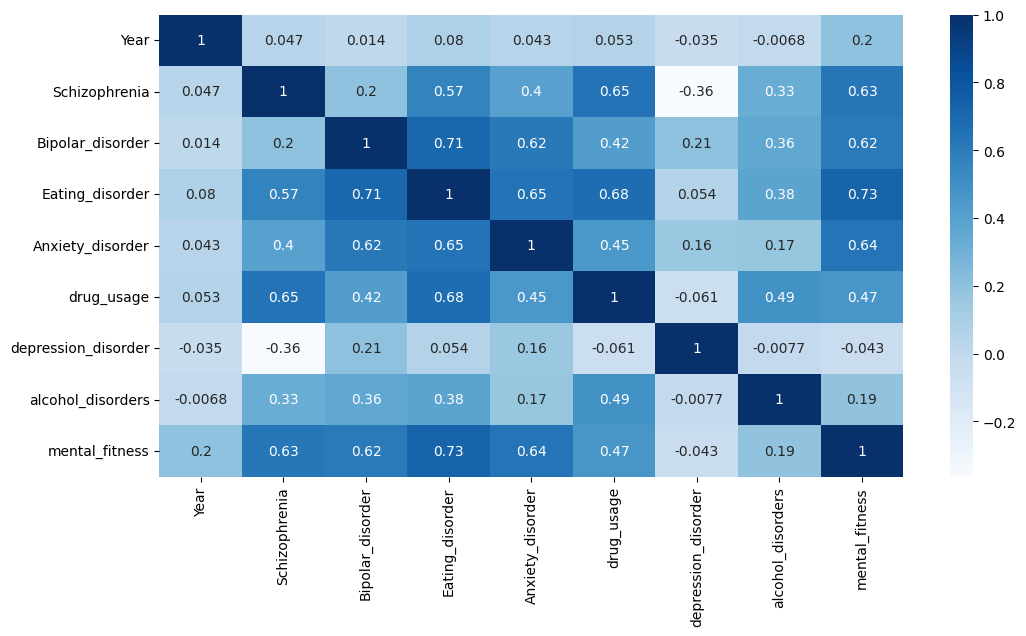

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

In [41]:
fig = px.pie(data, values='mental_fitness', names='Year')
fig.show()

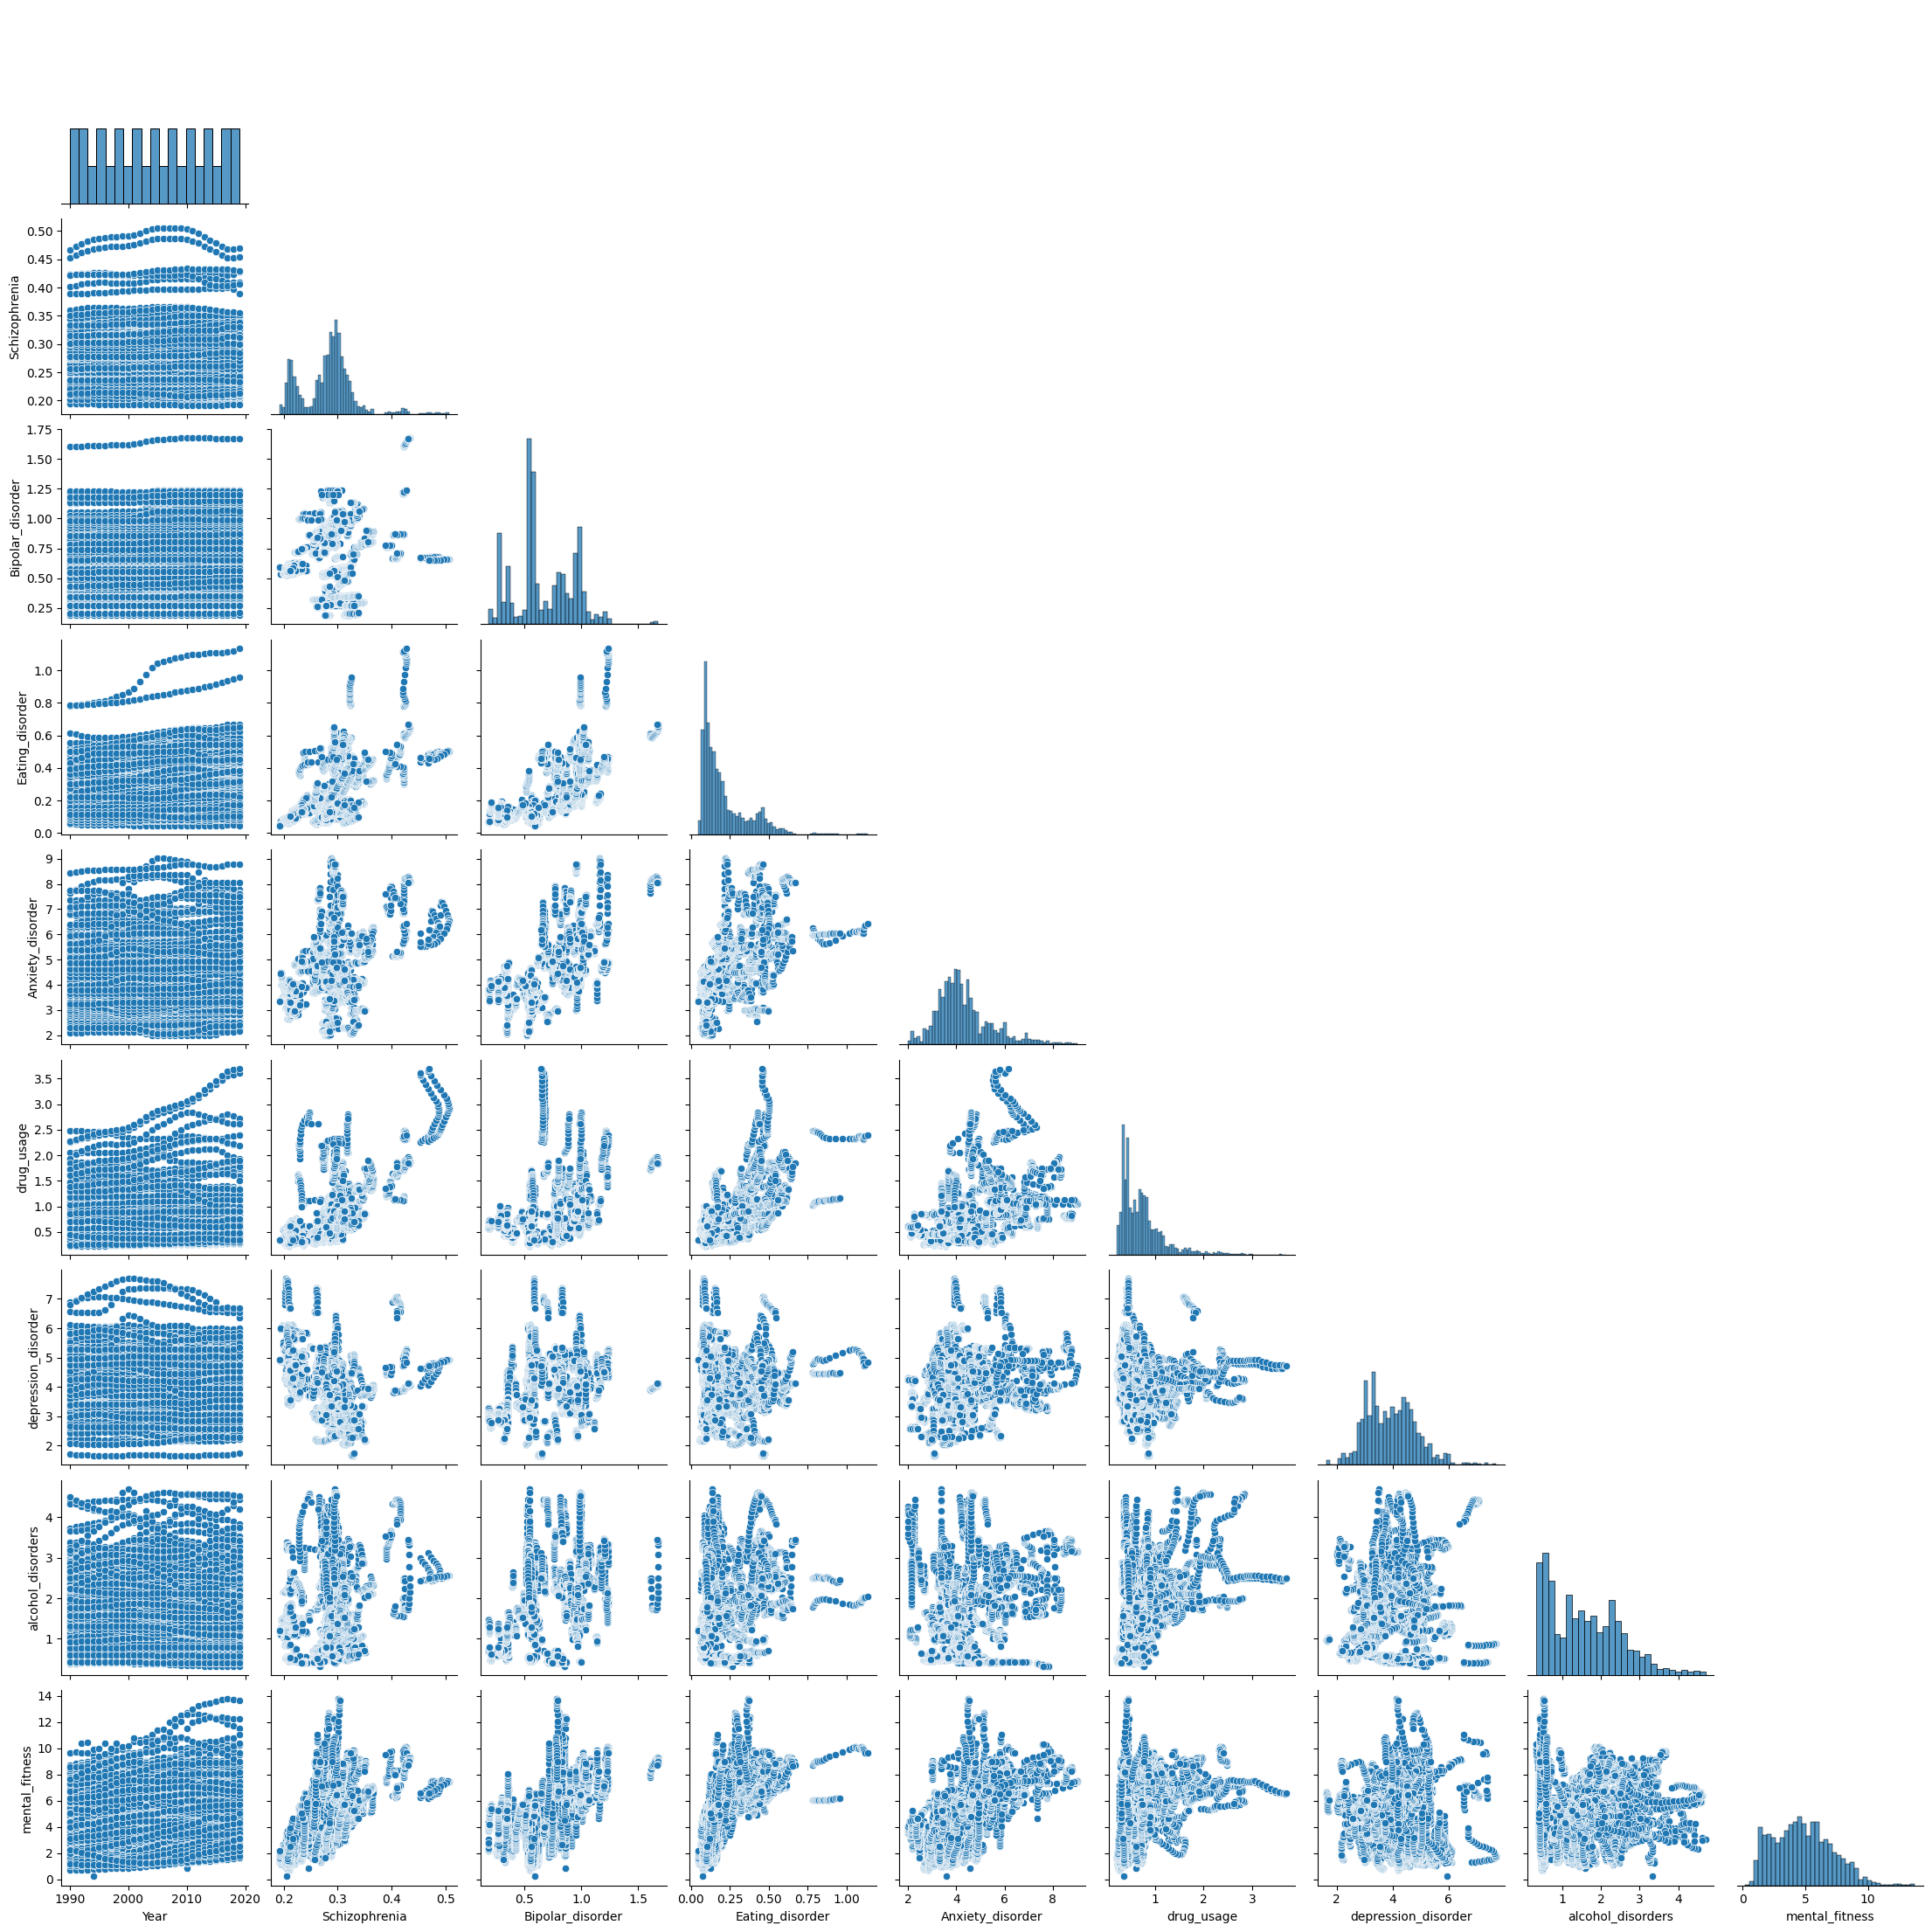

In [42]:
sns.pairplot(data,corner=True)
plt.show()

In [43]:
mean = data['mental_fitness'].mean()
mean

4.8180618117506135

In [44]:
label=LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i]=label.fit_transform(data[i])

In [45]:
X = data.drop('mental_fitness',axis=1)
y = data['mental_fitness']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
# For train datasets

y_train_pred = lr.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

MSE is 1.3143177618762658
RMSE is 1.146436985567138
R2 score is 0.7520520108771577




In [48]:
# For test datasets

y_test_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_test_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

MSE is 1.4195175711205938
RMSE is 1.1914350889245262
R2 score is 0.7237219348912027


In [49]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [50]:
# For train datasets

y_train_pred = rf.predict(x_train)
mse = mean_squared_error(y_train, y_train_pred)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)

print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

MSE is 0.005323577404706264
RMSE is 0.07296284948318743
R2 score is 0.9989956992511824




In [51]:
# For test datasets

y_test_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_test_pred)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2 = r2_score(y_test, y_test_pred)

print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

MSE is 0.035181020200651204
RMSE is 0.18756604223753084
R2 score is 0.9931527834615556


In [52]:
# y_pred = rf.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print("confusion_matrix: ", confusion_matrix)

In [53]:
# y_pred = lr.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# confusion_matrix = confusion_matrix(y_test, y_pred)
# print("confusion_matrix: ", confusion_matrix)

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
